### Import Modules

In [99]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as fplt
import numpy as np
import datetime as dt
import pandas as pd

### Connect to the tiingo API

In [10]:
api_key = '1c0af2df7ce543a90a6d13c2b6b4f87a659f496b'

# Tesla, Nissan, Volkswagen, Ford tickers
tickers = ['TSLA', 'NSANF', 'VWAGY', 'FOVSY']


# Start and end dates for data extraction
start = "2020-1-1"
end = "2021-1-1"

# Access the API
df = pdr.tiingo.TiingoDailyReader(tickers, start=start, end=end, api_key=api_key)

# Read the data and print the dead of the table
all_data = df.read()
all_data = all_data.rename(columns={"adjClose": "Close", "adjOpen": "Open", "adjHigh": "High", "adjLow": "Low",
                                    "adjVolume": "Volume"}, errors="raise")

all_data.head()


/Users/sophiecoding/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close    high     low    open    volume  \
symbol date                                                                  
TSLA   2020-01-02 00:00:00+00:00  430.26  430.70  421.71  424.50   9532100   
       2020-01-03 00:00:00+00:00  443.01  454.00  436.92  440.50  17778500   
       2020-01-06 00:00:00+00:00  451.54  451.56  440.00  440.47  10133000   
       2020-01-07 00:00:00+00:00  469.06  471.63  453.36  461.40  17882100   
       2020-01-08 00:00:00+00:00  492.14  498.49  468.23  473.70  31144300   

                                   Close    High     Low    Open     Volume  \
symbol date                                                                   
TSLA   2020-01-02 00:00:00+00:00  86.052  86.140  84.342  84.900   47660500   
       2020-01-03 00:00:00+00:00  88.602  90.800  87.384  88.100   88892500   
       2020-01-06 00:00:00+00:00  90.308  90.312  88.000  88.094   50665000   
       2020-01-07 00:00:00+00:00  93.812  94.326  90.672  92.280   89410500   
       2020-01-08 00:00:00+00:00  98.428  99.698  93.646  94.740  155721500   

                                  divCash  splitFactor  
symbol date                                             
TSLA   2020-01-02 00:00:00+00:00      0.0          1.0  
       2020-01-03 00:00:00+00:00      0.0          1.0  
       2020-01-06 00:00:00+00:00      0.0          1.0  
       2020-01-07 00:00:00+00:00      0.0          1.0  
       2020-01-08 00:00:00+00:00      0.0          1.0

### Save the Data as a CSV File

In [11]:
# Save all data as a csv
all_data_csv = all_data.to_csv('car_stock_prices_2020.csv', date_format='%Y-%m-%d')

### Load the CSV

In [21]:
# Load CSV into the variable name cars_df
cars_df = pd.read_csv('car_stock_prices_2020.csv', parse_dates=True)

# Check the csv looks okay
cars_df.head()

,symbol,date,close,high,low,open,volume,Close,High,Low,Open,Volume,divCash,splitFactor
0,TSLA,2020-01-02,430.26,430.70,421.71,424.50,9532100,86.052,86.140,84.342,84.900,47660500,0.0,1.0
1,TSLA,2020-01-03,443.01,454.00,436.92,440.50,17778500,88.602,90.800,87.384,88.100,88892500,0.0,1.0
2,TSLA,2020-01-06,451.54,451.56,440.00,440.47,10133000,90.308,90.312,88.000,88.094,50665000,0.0,1.0
3,TSLA,2020-01-07,469.06,471.63,453.36,461.40,17882100,93.812,94.326,90.672,92.280,89410500,0.0,1.0
4,TSLA,2020-01-08,492.14,498.49,468.23,473.70,31144300,98.428,99.698,93.646,94.740,155721500,0.0,1.0


### Create a Pivot Table with the Key Columns Required for Further Analysis

In [23]:
# Create pivot table with column headings required for further analysis
cars_pivot = pd.pivot_table(cars_df, index='date', values=['Close', 'Open', 'High', 'Low', 'Volume'], columns='symbol')

# Convert the date (i.e. the index) to datetime format
cars_pivot.index = pd.to_datetime(cars_pivot.index)

# Remove NA values which will affect processing later on
cars_pivot = cars_pivot.dropna()

cars_pivot

Close                                  High                  \
symbol          FOVSY  NSANF     TSLA      VWAGY      FOVSY  NSANF     TSLA   
date                                                                          
2020-01-02  51.249277  5.850   86.052  18.914661  51.249277  5.900   86.140   
2020-01-03  51.249277  5.825   88.602  18.458199  51.249277  5.840   90.800   
2020-01-06  51.249277  5.830   90.308  18.657901  51.249277  5.850   90.312   
2020-01-07  51.249277  5.900   93.812  18.562805  51.249277  5.900   94.326   
2020-01-08  51.249277  5.880   98.428  18.705449  51.249277  5.960   99.698   
...               ...    ...      ...        ...        ...    ...      ...   
2020-12-24  74.393667  5.315  661.770  20.465942  74.393667  5.315  666.090   
2020-12-28  74.393667  5.260  663.690  20.469872  74.393667  5.450  681.400   
2020-12-29  74.393667  5.430  665.990  20.456117  74.393667  5.470  669.900   
2020-12-30  74.393667  5.190  694.780  20.584336  74.393667  5.390  696.600   
2020-12-31  74.393667  5.250  705.670  20.485592  74.393667  5.620  718.720   

                             Low                                   Open  \
symbol          VWAGY      FOVSY  NSANF      TSLA      VWAGY      FOVSY   
date                                                                      
2020-01-02  18.921318  51.249277  5.820   84.3420  18.676920  51.249277   
2020-01-03  18.581824  51.249277  5.745   87.3840  18.427768  51.249277   
2020-01-06  18.686430  51.249277  5.800   88.0000  18.382122  51.249277   
2020-01-07  18.733978  51.249277  5.875   90.6720  18.505747  51.249277   
2020-01-08  18.724468  51.249277  5.832   93.6460  18.439179  51.249277   
...               ...        ...    ...       ...        ...        ...   
2020-12-24  20.485592  74.393667  5.315  641.0000  20.289088  74.393667   
2020-12-28  20.593670  74.393667  5.260  660.8000  20.436466  74.393667   
2020-12-29  20.524893  74.393667  5.410  655.0000  20.387340  74.393667   
2020-12-30  20.770524  74.393667  5.190  668.3603  20.505243  74.393667   
2020-12-31  21.124232  74.393667  5.210  691.1200  20.436466  74.393667   

                                      Volume                                  
symbol      NSANF     TSLA      VWAGY  FOVSY    NSANF         TSLA     VWAGY  
date                                                                          
2020-01-02  5.820   84.900  18.703547    0.0   2690.0   47660500.0   71029.0  
2020-01-03  5.745   88.100  18.477218    0.0   2722.0   88892500.0   35542.0  
2020-01-06  5.800   88.094  18.410651    0.0   2939.0   50665000.0  115265.0  
2020-01-07  5.875   92.280  18.625568    0.0    655.0   89410500.0  181254.0  
2020-01-08  5.950   94.740  18.448689   25.0   3755.0  155721500.0  232014.0  
...           ...      ...        ...    ...      ...          ...       ...  
2020-12-24  5.315  642.990  20.367689    0.0    364.0   22865568.0  124297.0  
2020-12-28  5.450  674.510  20.475767    0.0   1911.0   31553561.0  229831.0  
2020-12-29  5.450  661.000  20.524893    0.0   2615.0   22910811.0  103678.0  
2020-12-30  5.390  672.000  20.701747    0.0   1304.0   42846021.0  152589.0  
2020-12-31  5.620  699.990  21.124232    0.0  19363.0   49649928.0  127071.0  

[251 rows x 20 columns]

## Candlestick Diagram

Candlestick diagrams show the Open, Close, Max and Min stock prices each day, as well as the total Volume sold that day. The below diagrams are shown throughout 2020 and the colours indicate whether the close price was higher or lower than the open price. Red indicates it was lower, green indicates it was higher. In general this fluctuates a huge amount throughout the year. However, you can tell that more stocks were sold on the days where the close price was much higher than the opening price, as the biggest peaks in the volume diagram are green. Nissan is an exception to this as it's highest peak is red. However, Tesla shows the largest changes and sticks to this trend. Ford generally shows very little change in stock prices and very few stocks are bought. This could be because there is no change and so isn't a worthwhile investment. 

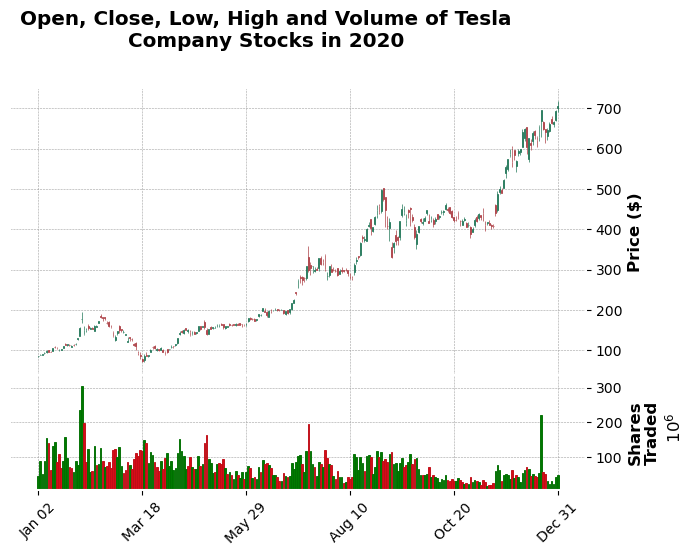

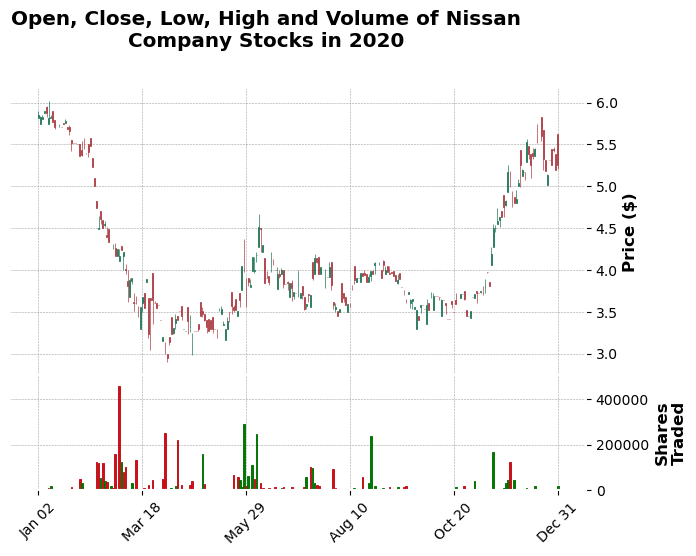

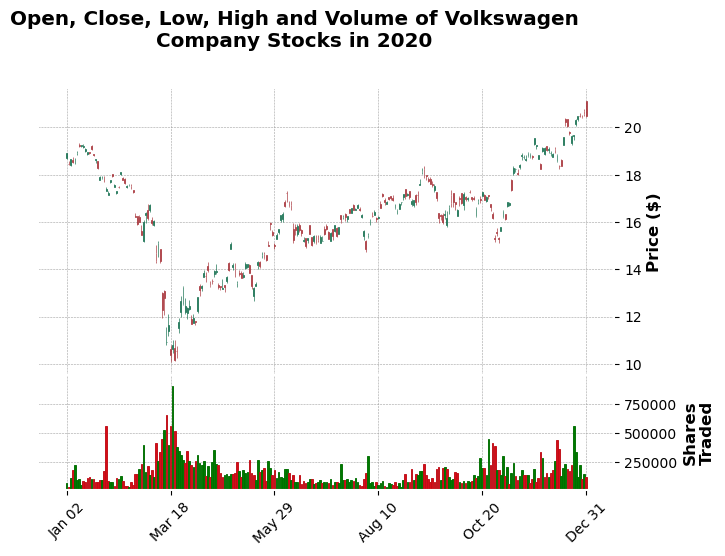

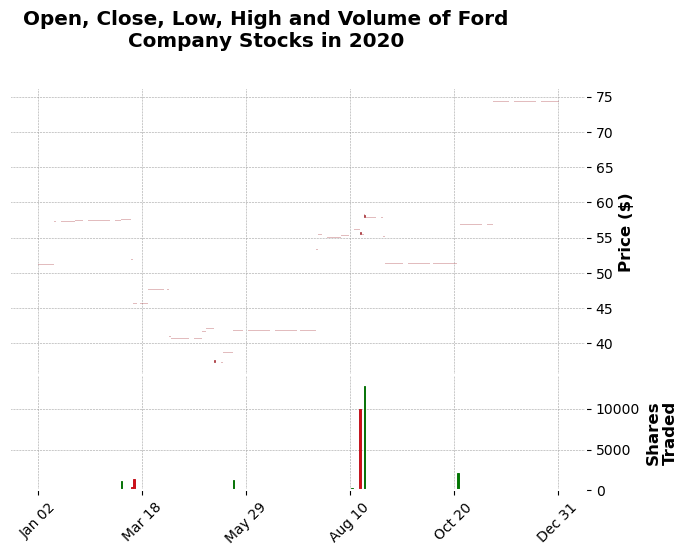

None


In [25]:
def candlestick(candle_df, tick):
    # Swap the level of the headings and the tickers, so each ticker can be accessed through the headings
    candle_df_swapped = candle_df.swaplevel(0, 1, axis=1).sort_index(axis=1)

    car_names = {'TSLA': 'Tesla',
                 'NSANF': 'Nissan',
                 'VWAGY': 'Volkswagen',
                 'FOVSY': 'Ford'}

    for i in tick:

        fplt.plot(
            candle_df_swapped[i],
            type='candle',
            style='charles',
            title='Open, Close, Low, High and Volume of {}\nCompany Stocks in 2020'.format(car_names[i]),
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded'
        )

    print(fplt.show())


candlestick(cars_pivot, tickers)

# print(cars_pivot)

## Scatter Diagram of Open vs Close Price

Tesla was removed from this diagram as it has such a large stock price in comparison to the other companies, it means the data from the others can not be easily compared. The graph shows how the Opening price impacts shares sold on that day. Interestingly there is not an obvious trend, which could be because each day has been plotted individually. There are very small changes day to day and so looking at volume sold per month compared to the average opening price could give more insight into any trends with this data.
Volkswagen shows a very slight trend of more stocks being sold at lower opening prices, which shows that people are buying the stock when it is a lower price.
An interesting comparison would be the volume of shares sold compared to the percentage decrease on the day before. 

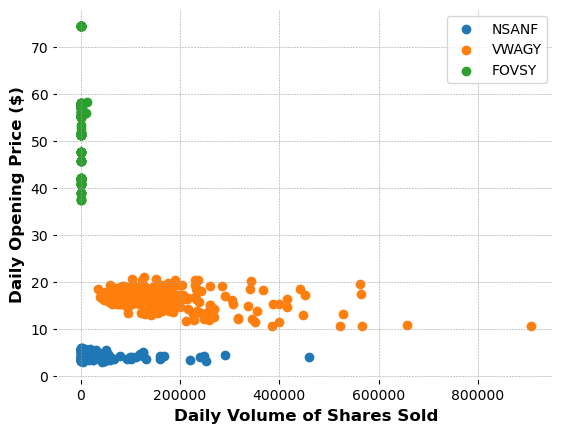

In [27]:
def open_close(open_df):
    # Opening price vs. closing price, excluding Tesla as this is so high it's incomparable
    for i in tickers[1:]:
        daily_vol = open_df['Volume'].loc[:, i]
        daily_open = open_df['Open'].loc[:, i]
#         print(daily_vol, daily_open)
        plt.scatter(daily_vol, daily_open, label=i)
    plt.legend()
    plt.xlabel('Daily Volume of Shares Sold')
    plt.ylabel('Daily Opening Price ($)')
    plt.show()
    
open_close(cars_pivot)

## Bar Chart of Stock Prices per Month and Line Graph of Opening Stock Price

The following graph shows a bar chart of the total volume of stocks sold by month, compared to the average opening price of that stock per day. This shows the trend between the two. 
There is a fairly clear trend that as stock price increases, fewer stocks are sold. Ford is interesting, as it drops very suddenly in May to an all time low, then it starts to increase quite steeply. There is suddenly a huge peak in August which is likely because people thought it would continue increasing quickly and so wanted to buy quickly before it got too high. It then drops slightly and there is another smaller peak in volume bought, presumably because it starts to increase again by the end of October, and so people want to buy again before it starts to increase. 
Nissan has a huge drop in opening price from January to April and this is where the bulk of the sales volume comes from. People will buy as it drops and stop buying once it has increased too much. Similarly Volkswagen has a huge drop in March and this is where the bulk of their sales come from.
In March 2020 is when lockdown began in the UK and so it's likely this has an impact on all four stock prices dropping around this time. 

First Create a table to group by Month

In [127]:
# Trying to group by month so you can see a bar chart of monthly sales
g = cars_df.reset_index()  # Reset the index to 0, 1, 2, etc. instead of date

g.date = pd.to_datetime(g.date)  # Convert date to datetime format

g.date = g.date.dt.strftime('%Y-%m')  # Write datetime as year and month

g_pivot = pd.pivot_table(g, index='date', values=['Volume'], columns='symbol', aggfunc='sum')  # Create a pivot table sorted by date,
    # grouping total sales by month

open_pivot = pd.pivot_table(g, index='date', values=['Open'], columns='symbol', aggfunc='mean')

Then write the function to plot the bar graph

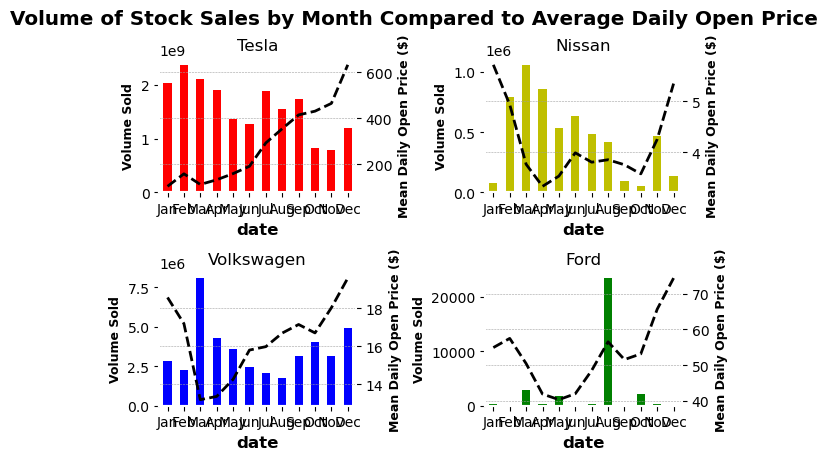

In [124]:
def monthly_bar(vol_by_month, tick, open):
    vol_by_month.reset_index()
    open.reset_index()
    fig_num = 0
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    car_names = {'TSLA': {'name': 'Tesla', 'color': 'r'},
                 'NSANF': {'name': 'Nissan', 'color': 'y'},
                 'VWAGY': {'name': 'Volkswagen', 'color': 'b'},
                 'FOVSY': {'name': 'Ford', 'color': 'g'}}
    
    for i in tick:
        
        fig_num += 1
        
        plt.subplot(2, 2, fig_num)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        volume = vol_by_month['Volume'].loc[:, i]
        opening = open['Open'].loc[:, i]
        
        volume.plot.bar(x=months, y=volume, width=0.5, color=car_names[i]['color'])
        plt.ylabel('Volume Sold', fontsize=9)
#         plt.yticks(fontsize=9)
        
        idx = np.asarray([i for i in range(len(months))])
        
        opening.plot.line(x=months, y=opening, secondary_y=True, color='k', linestyle='dashed')
        plt.ylabel('Mean Daily Open Price ($)', fontsize=9)
#         plt.yticks(fontsize=9)
        plt.xlabel('Month')
        
        plt.xticks(idx, months, rotation=45)
        plt.title(car_names[i]['name'])
        
    plt.suptitle('Volume of Stock Sales by Month Compared to Average Daily Open Price')
    plt.show()

    
monthly_bar(g_pivot, tickers, open_pivot)

## 50 Day Moving Average

This is a nice way of visualising the trend in a less 'jagged' way. You can see that compared to Tesla, the other car companies barely change their opening price day to day. However, once you remove Tesla you can see there is actually quite a lot of fluctuation within the other companies. It is just less noticeable than tesla. When you plot them separately you can see more significant fluctuations. 

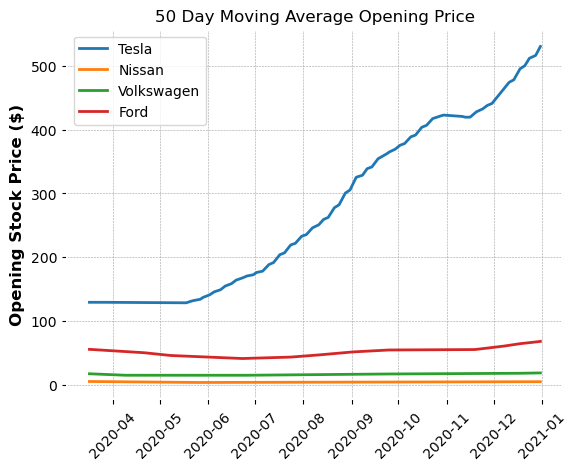

In [133]:
def moving_average(moving_df, ticker):
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    car_names = {'TSLA': 'Tesla',
             'NSANF': 'Nissan',
             'VWAGY': 'Volkswagen',
             'FOVSY': 'Ford'}
    
    plt.figure()
    
    for i in ticker:
        moving_df['CA50 {}'.format(i)] = moving_df['Open'].loc[:, i].rolling(50).mean()
        plt.plot(moving_df['CA50 {}'.format(i)], label=car_names[i])

    plt.xticks(rotation=45)                 
    plt.title('50 Day Moving Average Opening Price')
    plt.ylabel('Opening Stock Price ($)')
    plt.legend()
    plt.show()
                 

moving_average(cars_pivot, tickers)

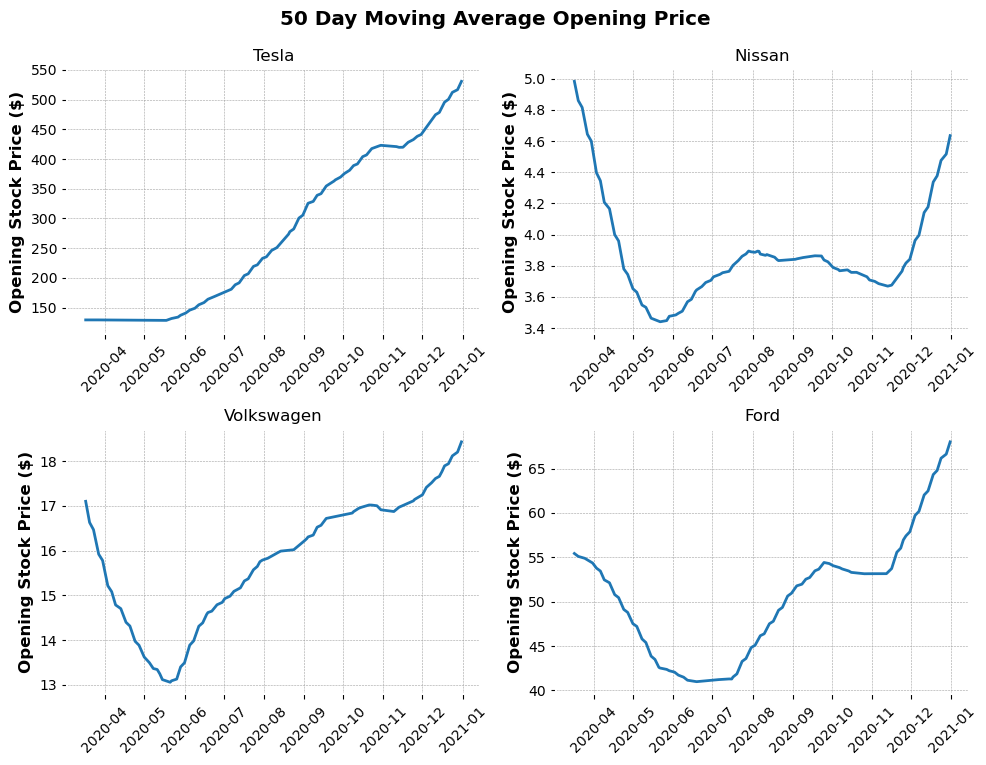

In [151]:
def moving_average_no_tesla(moving_df, ticker):
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    car_names = {'TSLA': 'Tesla',
             'NSANF': 'Nissan',
             'VWAGY': 'Volkswagen',
             'FOVSY': 'Ford'}
    
    plt.figure(figsize=(10, 8))

    count = 1
    for i in ticker:
        plt.subplot(2, 2, count)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        moving_df['CA50 {}'.format(i)] = moving_df['Open'].loc[:, i].rolling(50).mean()
        plt.plot(moving_df['CA50 {}'.format(i)], label=car_names[i])
        count += 1
        plt.xticks(rotation=45) 
        plt.title(car_names[i])
        plt.ylabel('Opening Stock Price ($)')
                
    plt.suptitle('50 Day Moving Average Opening Price')
    plt.show()
                 

moving_average_no_tesla(cars_pivot, tickers)